### original code from palantir vignette : https://nbviewer.org/github/dpeerlab/Palantir/blob/master/notebooks/Palantir_sample_notebook.ipynb
import palantir
import scanpy as sc
import pandas as pd
import os

In [1]:
import palantir #original code from palantir vignette : https://nbviewer.org/github/dpeerlab/Palantir/blob/master/notebooks/Palantir_sample_notebook.ipynb
import scanpy as sc
import pandas as pd
import os

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [2]:
# Plotting
import matplotlib
import matplotlib.pyplot as plt

# warnings
import warnings
from numba.core.errors import NumbaDeprecationWarning

warnings.filterwarnings(action="ignore", category=NumbaDeprecationWarning)
warnings.filterwarnings(
    action="ignore", module="scanpy", message="No data for colormapping"
)

# Inline plotting
%matplotlib inline

In [3]:
# Load sample data
data_dir = os.path.expanduser("/groups/tanaka/People/current/jiwang/projects/RA_competence/results/scRNAseq_R13547_10x_mNT_20220813/RA_symetryBreaking/dataIntegration_timePoints_4pseudotime/")
#download_url = "https://dp-lab-data-public.s3.amazonaws.com/palantir/marrow_sample_scseq_counts.h5ad"


In [4]:
file_path = os.path.join(data_dir, "RNAmatrix_RA_d2_d5_all.h5ad")
ad = sc.read(file_path, chunk_size=6000)
ad

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/palantir_py3.9/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 40311 × 18813
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_css', 'X_umap'

In [5]:
sc.pp.normalize_per_cell(ad)

In [6]:
palantir.preprocess.log_transform(ad)

In [7]:
sc.pp.highly_variable_genes(ad, n_top_genes=2000, flavor="cell_ranger")

In [11]:
# Note in the manuscript, we did not use highly variable genes but scanpy by default uses only highly variable genes
sc.pp.pca(ad)

In [12]:
ad

AnnData object with n_obs × n_vars = 40311 × 18813
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_counts'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca'
    obsm: 'X_css', 'X_umap', 'X_pca'
    varm: 'PCs'

In [13]:
# Run diffusion maps
#dm_res = palantir.utils.run_diffusion_maps(ad, n_components=10, pca_key = 'X_css')
dm_res = palantir.utils.run_diffusion_maps(ad, n_components=10)

Determing nearest neighbor graph...


In [14]:
ms_data = palantir.utils.determine_multiscale_space(ad)

In [15]:
#sc.pp.neighbors(ad, n_pcs = 80, use_rep = 'X_css', metric = 'cosine', n_neighbors = 30, method = 'umap')
sc.pp.neighbors(ad, metric = 'cosine', n_neighbors = 30, method = 'umap')
sc.tl.umap(ad, min_dist = 0.3)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

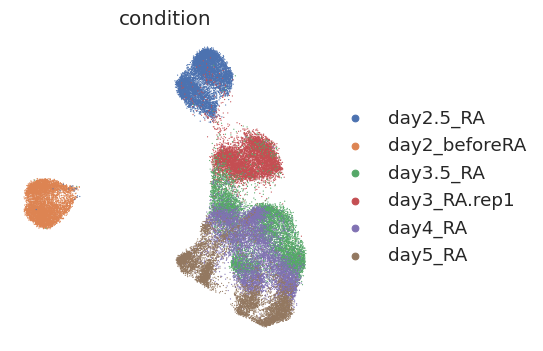

In [16]:
# Use scanpy functions to visualize umaps or FDL
sc.pl.embedding(
    ad,
    basis="umap",
    color = 'condition',
    frameon=False,
)

In [17]:
imputed_X = palantir.utils.run_magic_imputation(ad)

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

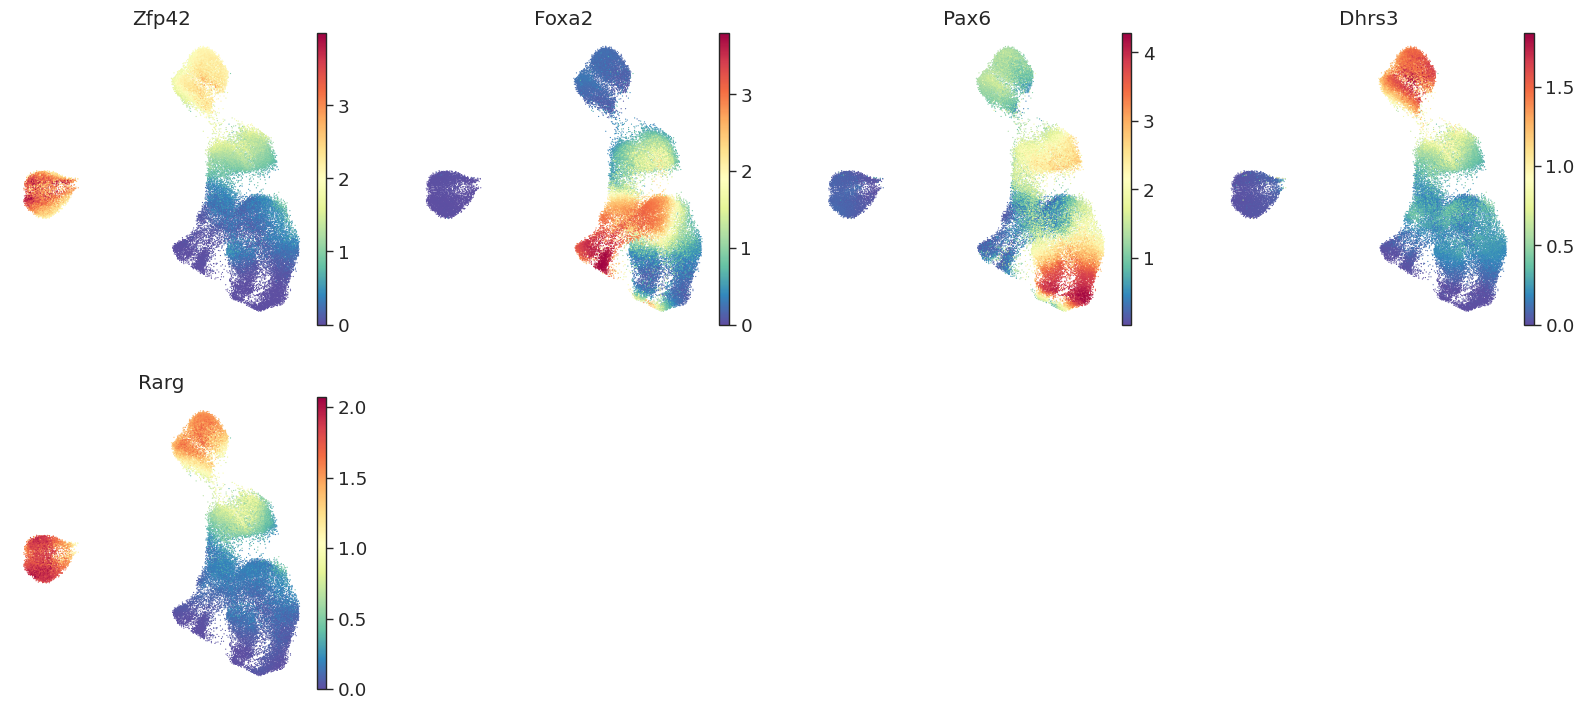

In [18]:
sc.pl.embedding(
    ad,
    basis="umap",
    layer="MAGIC_imputed_data",
    color=["Zfp42", "Foxa2", "Pax6", "Dhrs3", "Rarg"],
    frameon=False,
)
plt.show()

In [19]:
imputated = ad.layers["MAGIC_imputed_data"]

In [20]:
df = pd.DataFrame(imputated)

In [21]:
df.to_csv(os.path.join(data_dir, "MAGIC_imputed_data_noCSS.csv"))

In [22]:
ad.obs[['condition', 'cell.id']].to_csv(os.path.join(data_dir, "palantir_cells_noCSS.csv"))

In [23]:
ad.var[['vst.mean', 'dispersions']].to_csv(os.path.join(data_dir, "palantir_genes_noCSS.csv"))

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

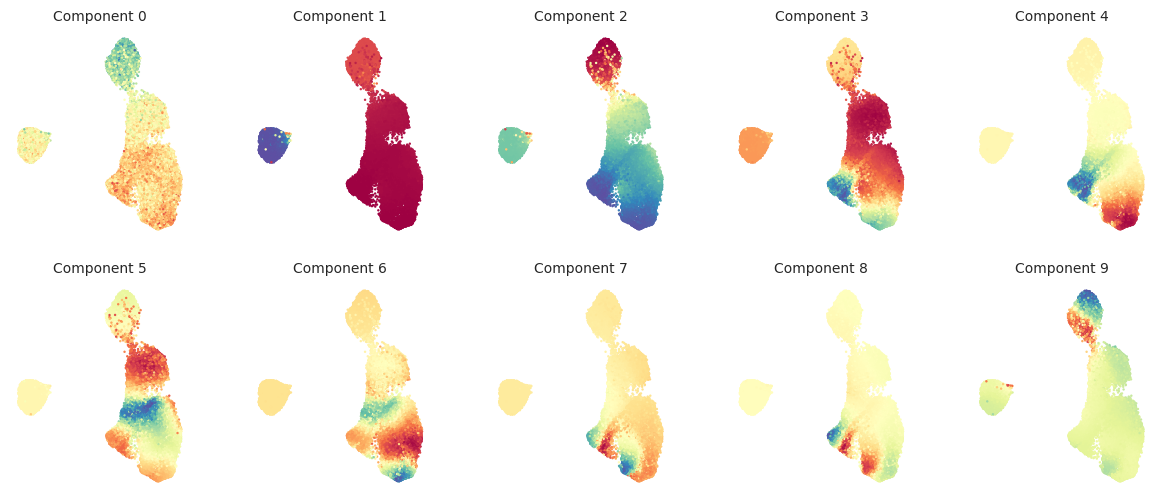

In [24]:
palantir.plot.plot_diffusion_components(ad)
plt.show()

In [25]:
terminal_states = pd.Series(
    ["FP", "NP"],
    index=["GTTACCCTCTACGCAA-1_2_1", "CATGCTCGTTCGTACA-1_2_1"],
)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.


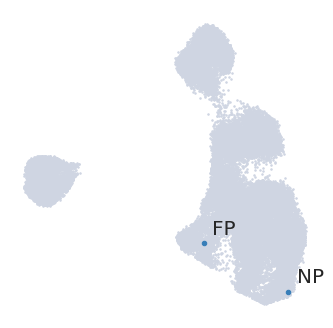

In [26]:
palantir.plot.highlight_cells_on_umap(ad, terminal_states)
plt.show()

In [27]:
start_cell = "GTCCACTGTGCATGTT-1_1_1_1_1_1_1_1_1"
pr_res = palantir.core.run_palantir(
    ad, start_cell, num_waypoints=500, terminal_states=terminal_states
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.04994768699010213 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...


findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


Time for shortest paths: 1.0209406773249308 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

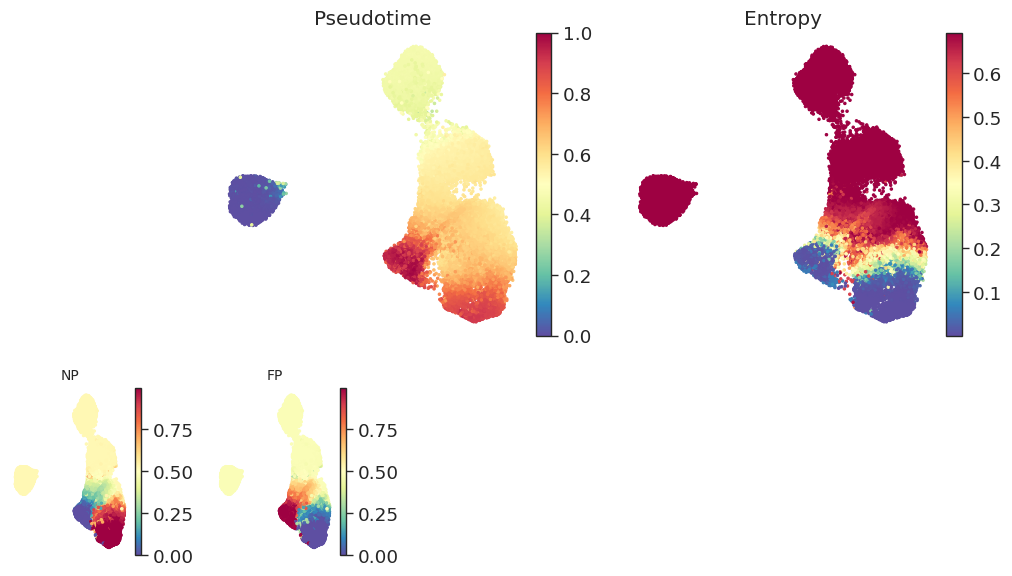

In [28]:
palantir.plot.plot_palantir_results(ad, s=3)
plt.show()


In [ ]:
ad

In [29]:
ad.obs[['palantir_pseudotime', 'palantir_entropy', 
           'condition', 'cell.id']]

,palantir_pseudotime,palantir_entropy,condition,cell.id
AAACCCAGTGCCGTAC-1_1_1_1_1_1_1_1_1,0.009321,0.692112,day2_beforeRA,AAACCCAGTGCCGTAC-1_day2_beforeRA_196324
AAACCCATCCTCTAGC-1_1_1_1_1_1_1_1_1,0.043751,0.692112,day2_beforeRA,AAACCCATCCTCTAGC-1_day2_beforeRA_196324
AAACCCATCGGACCAC-1_1_1_1_1_1_1_1_1,0.005867,0.692112,day2_beforeRA,AAACCCATCGGACCAC-1_day2_beforeRA_196324
AAACCCATCTGACGCG-1_1_1_1_1_1_1_1_1,0.022237,0.692112,day2_beforeRA,AAACCCATCTGACGCG-1_day2_beforeRA_196324
AAACGAAAGATGGTCG-1_1_1_1_1_1_1_1_1,0.049764,0.692112,day2_beforeRA,AAACGAAAGATGGTCG-1_day2_beforeRA_196324
...,...,...,...,...
TTTGTTGAGGTGGTTG-1_2_1,1.899462,0.435057,day5_RA,TTTGTTGAGGTGGTTG-1_day5_RA_196336
TTTGTTGCACGACCTG-1_2_1,1.742982,0.166333,day5_RA,TTTGTTGCACGACCTG-1_day5_RA_196336
TTTGTTGCATGACACT-1_2_1,2.170994,0.000545,day5_RA,TTTGTTGCATGACACT-1_day5_RA_196336
TTTGTTGGTCATCACA-1_2_1,1.983203,0.008164,day5_RA,TTTGTTGGTCATCACA-1_day5_RA_196336


In [30]:
ad.obs[['palantir_pseudotime', 'palantir_entropy', 
           'condition', 'cell.id']].to_csv(os.path.join(data_dir, "palantir_pseudotime_all_noCSS.csv"))

In [31]:
# compute gene trends over pseudotime using Palantir

In [32]:
masks = palantir.presults.select_branch_cells(ad, save_as_df = True, eps=0)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

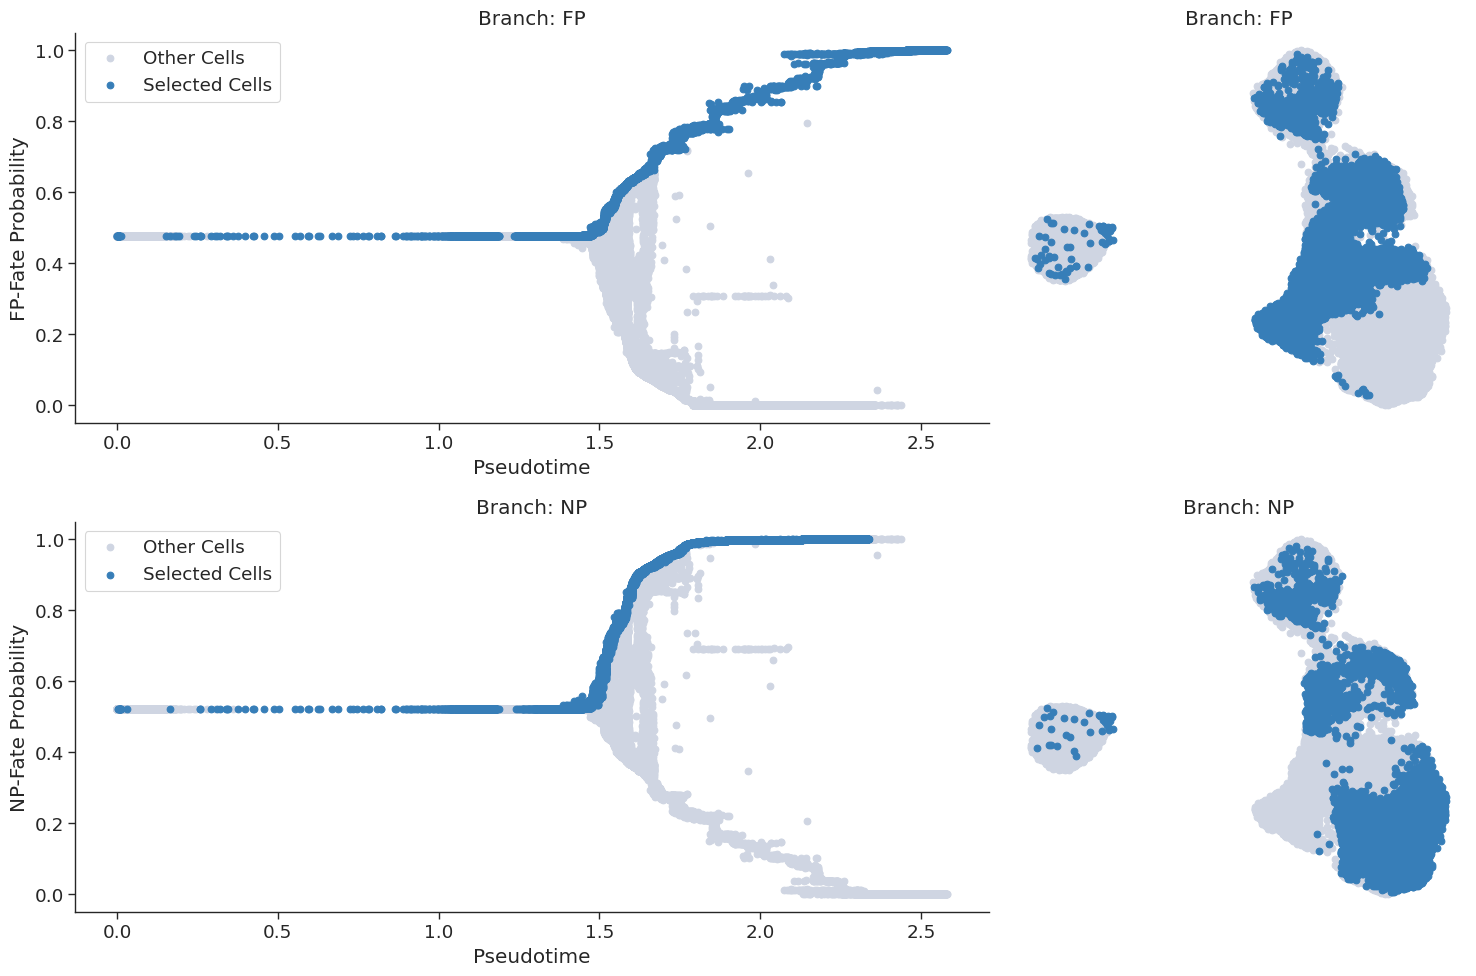

In [33]:
palantir.plot.plot_branch_selection(ad)
plt.show()

In [34]:
ad.obsm['branch_masks']

,NP,FP
AAACCCAGTGCCGTAC-1_1_1_1_1_1_1_1_1,False,False
AAACCCATCCTCTAGC-1_1_1_1_1_1_1_1_1,False,False
AAACCCATCGGACCAC-1_1_1_1_1_1_1_1_1,False,False
AAACCCATCTGACGCG-1_1_1_1_1_1_1_1_1,False,False
AAACGAAAGATGGTCG-1_1_1_1_1_1_1_1_1,False,False
...,...,...
TTTGTTGAGGTGGTTG-1_2_1,False,True
TTTGTTGCACGACCTG-1_2_1,True,False
TTTGTTGCATGACACT-1_2_1,True,False
TTTGTTGGTCATCACA-1_2_1,True,False


In [35]:
gene_trends = palantir.presults.compute_gene_trends(
    ad, expression_key="MAGIC_imputed_data",
)

NP
[2023-10-13 15:41:57,422] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (0) >= n_samples (10,657) and rank = 1.0.
[2023-10-13 15:41:57,423] [INFO    ] Using covariance function Matern52(ls=10.0).
[2023-10-13 15:41:57,482] [INFO    ] Recomputing covariance decomposition for predictive function.
FP
[2023-10-13 15:44:53,050] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (0) >= n_samples (11,713) and rank = 1.0.
[2023-10-13 15:44:53,051] [INFO    ] Using covariance function Matern52(ls=10.0).
[2023-10-13 15:44:53,082] [INFO    ] Recomputing covariance decomposition for predictive function.


In [36]:
gene_trends['NP']

{'trends':                0.004179  0.008856  0.013533  0.018210  0.022887  0.027564  \
 Xkr4           0.001594  0.001589  0.001584  0.001579  0.001574  0.001569   
 Gm37180       -0.002856 -0.002852 -0.002848 -0.002844 -0.002840 -0.002836   
 Gm37363        0.001242  0.001239  0.001237  0.001234  0.001232  0.001230   
 Gm38148       -0.002174 -0.002171 -0.002167 -0.002163 -0.002160 -0.002156   
 Gm19938        0.066423  0.066280  0.066138  0.065995  0.065853  0.065710   
 ...                 ...       ...       ...       ...       ...       ...   
 Pcdhb13       -0.000445 -0.000444 -0.000443 -0.000442 -0.000441 -0.000440   
 Zfp474         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 Galr1          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 Trpm3         -0.009206 -0.009182 -0.009157 -0.009132 -0.009107 -0.009082   
 1700018L02Rik -0.004952 -0.004940 -0.004929 -0.004917 -0.004905 -0.004893   
 
                0.032241  0.036918  0.041595  0.0462

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

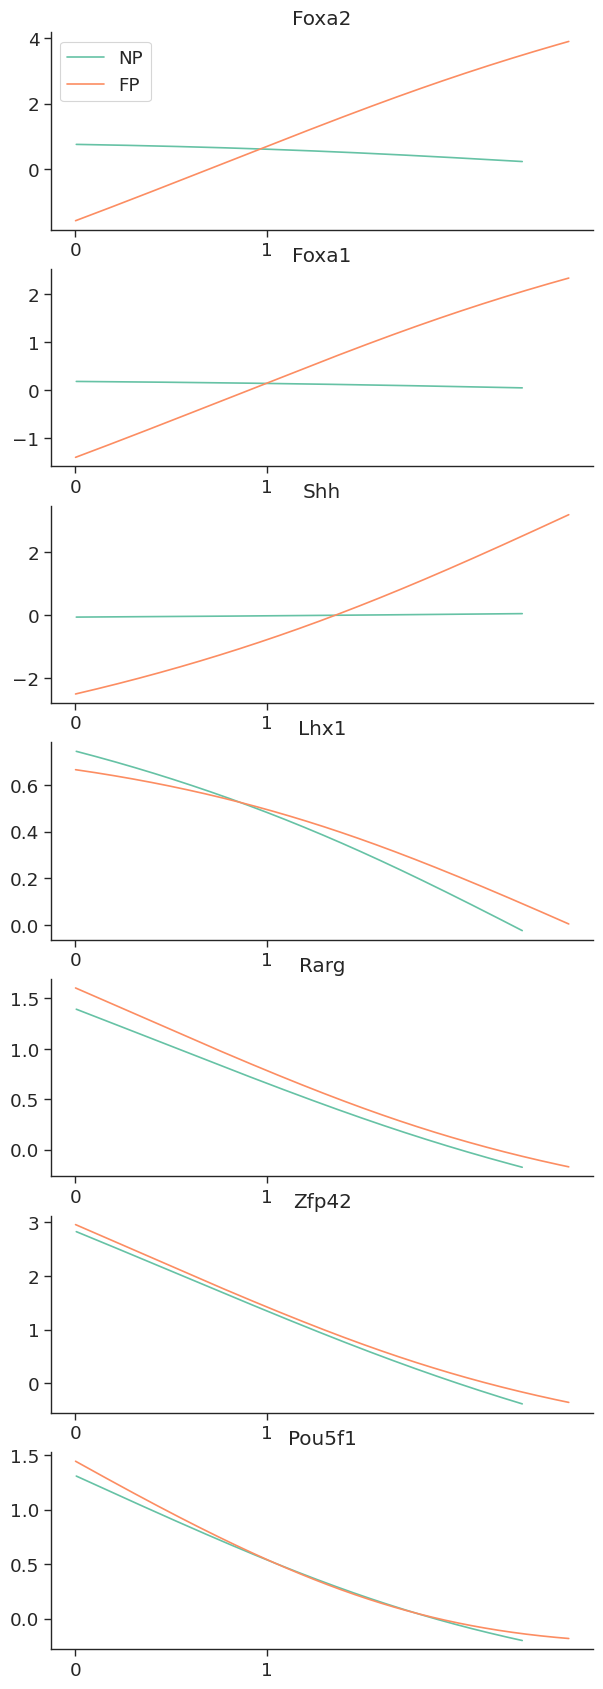

In [37]:
genes = ["Foxa2", "Foxa1", "Shh", "Lhx1", "Rarg", "Zfp42", "Pou5f1"]
palantir.plot.plot_gene_trends(ad, genes)
plt.show()

In [41]:
#file_path = os.path.join(data_dir, "RA_d2_d5_all_palantir_pseudotime_MAGIC_imputated.h5ad")
ad.obsm['branch_masks']

,NP,FP
AAACCCAGTGCCGTAC-1_1_1_1_1_1_1_1_1,False,False
AAACCCATCCTCTAGC-1_1_1_1_1_1_1_1_1,False,False
AAACCCATCGGACCAC-1_1_1_1_1_1_1_1_1,False,False
AAACCCATCTGACGCG-1_1_1_1_1_1_1_1_1,False,False
AAACGAAAGATGGTCG-1_1_1_1_1_1_1_1_1,False,False
...,...,...
TTTGTTGAGGTGGTTG-1_2_1,False,True
TTTGTTGCACGACCTG-1_2_1,True,False
TTTGTTGCATGACACT-1_2_1,True,False
TTTGTTGGTCATCACA-1_2_1,True,False


In [38]:
ad.obsm['branch_masks'].to_csv(os.path.join(data_dir, "palantir_pseudotime_cellfates.csv"))


In [42]:
ad

AnnData object with n_obs × n_vars = 40311 × 18813
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_counts', 'palantir_pseudotime', 'palantir_entropy'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'DM_EigenValues', 'neighbors', 'umap', 'condition_colors', 'palantir_waypoints'
    obsm: 'X_css', 'X_umap', 'X_pca', 'DM_EigenVectors', 'DM_EigenVectors_multiscaled', 'palantir_fate_probabilities', 'branch_masks'
    varm: 'PCs', 'gene_trends_NP', 'gene_trends_FP'
    layers: 'MAGIC_imputed_data'
    obsp: 'DM_Kernel', 'DM_Similarity', 'distances', 'connectivities'

In [44]:
ad.varm['gene_trends_NP']

,0.004179320487996333,0.008856339453542143,0.013533358419087954,0.018210377384633762,0.022887396350179577,0.027564415315725385,0.03224143428127119,0.03691845324681701,0.041595472212362816,0.046272491177908624,...,2.2959186136054437,2.3005956325709893,2.305272651536535,2.309949670502081,2.3146266894676266,2.3193037084331727,2.3239807273987183,2.3286577463642644,2.33333476532981,2.3380117842953556
Xkr4,0.001594,0.001589,0.001584,0.001579,0.001574,0.001569,0.001564,0.001559,0.001554,0.001549,...,0.004444,0.004464,0.004484,0.004503,0.004523,0.004542,0.004562,0.004582,0.004602,0.004622
Gm37180,-0.002856,-0.002852,-0.002848,-0.002844,-0.002840,-0.002836,-0.002832,-0.002828,-0.002823,-0.002819,...,0.005033,0.005063,0.005093,0.005123,0.005153,0.005184,0.005214,0.005244,0.005274,0.005305
Gm37363,0.001242,0.001239,0.001237,0.001234,0.001232,0.001230,0.001227,0.001225,0.001223,0.001220,...,0.004149,0.004166,0.004183,0.004201,0.004218,0.004236,0.004253,0.004271,0.004288,0.004306
Gm38148,-0.002174,-0.002171,-0.002167,-0.002163,-0.002160,-0.002156,-0.002152,-0.002148,-0.002144,-0.002141,...,0.005521,0.005551,0.005582,0.005612,0.005642,0.005673,0.005703,0.005734,0.005764,0.005795
Gm19938,0.066423,0.066280,0.066138,0.065995,0.065853,0.065710,0.065568,0.065425,0.065283,0.065141,...,0.019684,0.019666,0.019649,0.019631,0.019614,0.019597,0.019581,0.019565,0.019549,0.019534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pcdhb13,-0.000445,-0.000444,-0.000443,-0.000442,-0.000441,-0.000440,-0.000439,-0.000439,-0.000438,-0.000437,...,0.000339,0.000342,0.000344,0.000346,0.000349,0.000351,0.000353,0.000356,0.000358,0.000360
Zfp474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Galr1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Trpm3,-0.009206,-0.009182,-0.009157,-0.009132,-0.009107,-0.009082,-0.009057,-0.009032,-0.009007,-0.008982,...,0.006943,0.006982,0.007021,0.007060,0.007098,0.007137,0.007176,0.007215,0.007253,0.007292


In [45]:
ad.varm['gene_trends_NP'].to_csv(os.path.join(data_dir, "palantir_gene_trends_NP_noCSS.csv"))

In [46]:
ad.varm['gene_trends_FP'].to_csv(os.path.join(data_dir, "palantir_gene_trends_FP_noCSS.csv"))

In [40]:
file_path = os.path.join(data_dir, "RA_d2_d5_all_palantir_pseudotime_MAGIC_imputated_noCSS.h5ad")
#ad = sc.read(file_path, chunk_size=6000)
ad.write(file_path)